__Import important liabrary__

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import joblib


__Data Collection and Processing__

In [31]:
# loading the dataset from csv file

car_dataset = pd.read_csv('car_dataset.csv')

# inspecting the first 5 rows of the dataset

car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [32]:
# checking the number of rows and columns in the dataset

car_dataset.shape


(4340, 8)

In [33]:
# getting some information about the dataset

car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [34]:
# checking the distribution of categorical features

print(car_dataset.fuel.value_counts())

print(car_dataset.owner.value_counts())

print(car_dataset.transmission.value_counts())
print(car_dataset.seller_type.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64


__Encoding Categorical data__

In [35]:
# encoding "fuel" column
car_dataset.replace({'fuel':{'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3, 'Electric':4}}, inplace = True)

# encoding "owner" column
car_dataset.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace = True)

# encoding "transmission" column
car_dataset.replace({'transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

# encoding "seller_type" column
car_dataset.replace({'seller_type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}}, inplace = True)


C:\Users\asmit\AppData\Local\Temp\ipykernel_16696\247115528.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuel':{'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG':3, 'Electric':4}}, inplace = True)
C:\Users\asmit\AppData\Local\Temp\ipykernel_16696\247115528.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace = True)
C:\Users\asmit\AppData\Local\Temp\ipykernel_16696\247115528.py:

In [36]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


__Splitting the data into Tranning data and Test data__

In [37]:
X = car_dataset.drop(['name', 'selling_price'], axis = 1)
Y = car_dataset['selling_price']

In [38]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns]


In [39]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


$Splitting$ $Tranning$ $and$ $Test$ $data$

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1,random_state = 2) 

__Model Tranning__

$1.$ $Linear$ $Regression$

In [41]:
# loading the linear regression model

lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train, Y_train)

# saving the model to a file
joblib.dump(lin_reg_model, "linear_model.pkl")

['linear_model.pkl']

__Model Evaluation__

In [42]:
# prediction on tranning data 

tranning_data_prediction = lin_reg_model.predict(X_train)

In [43]:
# R squared Error

error_score = metrics.r2_score(Y_train, tranning_data_prediction)

print("R squared error - ",error_score)

R squared error -  0.4430787587921934


__Visualize the actual price and predicted price__

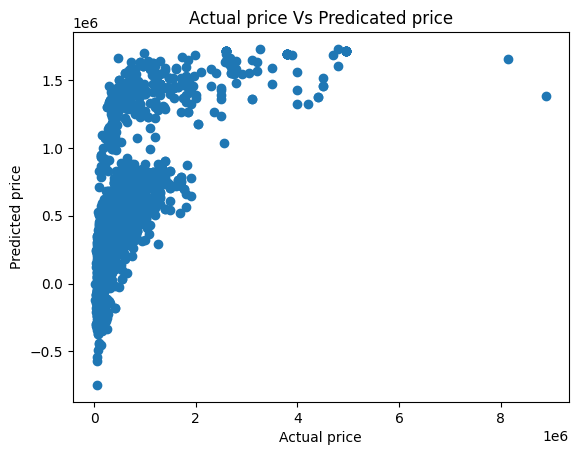

In [44]:
plt.scatter(Y_train, tranning_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicated price')
plt.show()

In [45]:
# prediction on testing data
 
testing_data_prediction = lin_reg_model.predict(X_test)


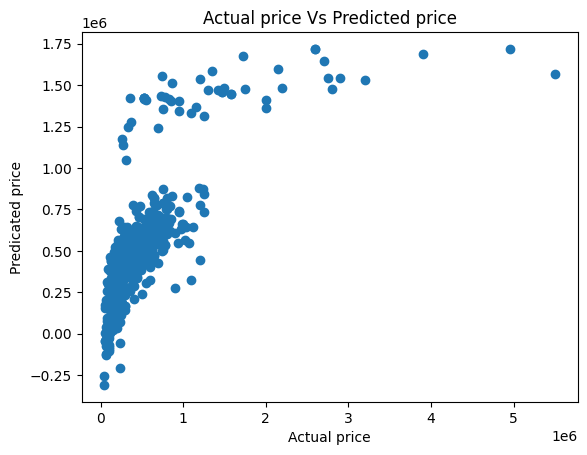

In [46]:
# visualize the test data and predicted data

plt.scatter(Y_test, testing_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicated price')
plt.title('Actual price Vs Predicted price')
plt.show()

$2.$ $LASSO$

In [47]:
# loading the LASSO model

lasso = Lasso()

lasso.fit(X_train, Y_train)

# saving the LASSO model to a file

joblib.dump(lasso, "lasso_model.pkl")

['lasso_model.pkl']

__Model Evaluation__

In [48]:
# prediction on tranning data 

tranning_data_prediction = lasso.predict(X_train)

In [49]:
# R squared Error

error_score = metrics.r2_score(Y_train, tranning_data_prediction)

print("R squared error - ",error_score)

R squared error -  0.4430787587404139


__Visualize the actual price and predicted price__

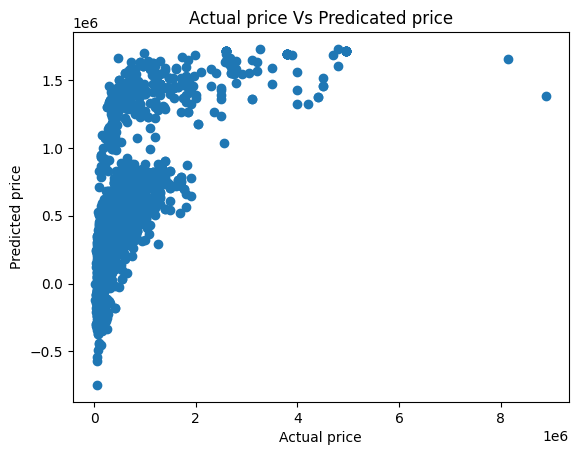

In [50]:
plt.scatter(Y_train, tranning_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicated price')
plt.show()

In [51]:
# prediction on testing data
 
testing_data_prediction = lasso.predict(X_test)


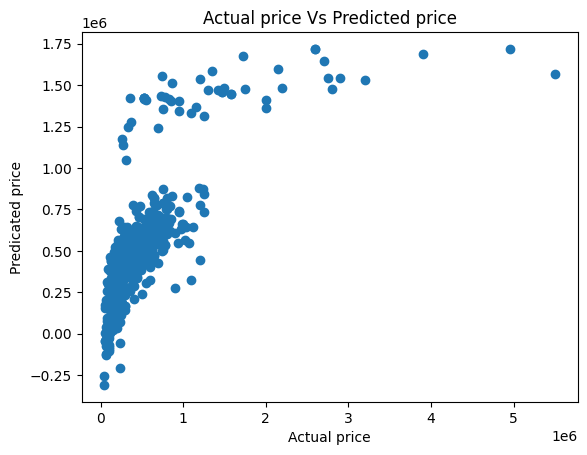

In [52]:
# visualize the test data and predicted data

plt.scatter(Y_test, testing_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicated price')
plt.title('Actual price Vs Predicted price')
plt.show()

In [53]:
year = int(input("Enter the year of purchase (e.g., 2014): "))
km_driven = int(input("Enter the kilometers driven: "))
fuel = input("Enter the fuel type (Petrol/Diesel/CNG/LPG/Electric): ").capitalize()
seller_type = input("Enter seller type (Individual/Dealer/Trustmark Dealer): ").capitalize()
transmission = input("Enter transmission type (Manual/Automatic): ").capitalize()
owner = input("Enter ownership status (First Owner/Second Owner/Third Owner/Fourth & Above Owner/Test Drive Car): ").title()

In [54]:
input_df = pd.DataFrame({
    'year': [year],
    'km_driven': [km_driven],
    'fuel': [fuel],
    'seller_type': [seller_type],
    'transmission': [transmission],
    'owner': [owner]
})

# encoding "fuel" 
input_df.replace({'fuel':{'Diesel':0, 'Petrol':1, 'Cng':2, 'Lpg':3, 'Electric':4}}, inplace = True)

# encoding "owner"
input_df.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace = True)

# encoding "transmission"
input_df.replace({'transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

# encoding "seller_type"
input_df.replace({'seller_type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}}, inplace = True)


C:\Users\asmit\AppData\Local\Temp\ipykernel_16696\898552973.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input_df.replace({'fuel':{'Diesel':0, 'Petrol':1, 'Cng':2, 'Lpg':3, 'Electric':4}}, inplace = True)
C:\Users\asmit\AppData\Local\Temp\ipykernel_16696\898552973.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input_df.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}}, inplace = True)
C:\Users\asmit\AppData\Local\Temp\ipykernel_16696\898552973.py:17: 

In [55]:
predicted_price = lin_reg_model.predict(input_df)
print(f"\n🚗 Predicted Car Price: ₹{int(predicted_price[0]):,}")


🚗 Predicted Car Price: ₹547,083
